# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [17]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [18]:
train, test = keras.datasets.cifar10.load_data()

In [21]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [22]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [23]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

50000/50000 [==============================] - 1s 29us/step - loss: 1.8309 - acc: 0.3469 - val_loss: 1.7306 - val_acc: 0.3923
Epoch 2/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.6033 - acc: 0.4300 - val_loss: 1.5870 - val_acc: 0.4267
Epoch 3/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.5141 - acc: 0.4633 - val_loss: 1.5425 - val_acc: 0.4508
Epoch 4/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.4551 - acc: 0.4823 - val_loss: 1.4893 - val_acc: 0.4638
Epoch 5/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.4082 - acc: 0.4994 - val_loss: 1.5539 - val_acc: 0.4529
Epoch 6/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.3647 - acc: 0.5173 - val_loss: 1.4154 - val_acc: 0.4982
Epoch 7/50
50000/50000 [==============================] - 1s 26us/step - loss: 1.3321 - acc: 0.5265 - val_loss: 1.4029 - val_acc: 0.5011
Epoch 8/50
50000/50000 [============================

Epoch 3/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.7029 - acc: 0.4033 - val_loss: 1.6742 - val_acc: 0.4117
Epoch 4/50
50000/50000 [==============================] - 1s 26us/step - loss: 1.6460 - acc: 0.4213 - val_loss: 1.6290 - val_acc: 0.4292
Epoch 5/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.6003 - acc: 0.4406 - val_loss: 1.5892 - val_acc: 0.4430
Epoch 6/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.5617 - acc: 0.4518 - val_loss: 1.5602 - val_acc: 0.4490
Epoch 7/50
50000/50000 [==============================] - 1s 28us/step - loss: 1.5282 - acc: 0.4650 - val_loss: 1.5379 - val_acc: 0.4546
Epoch 8/50
50000/50000 [==============================] - 1s 28us/step - loss: 1.4973 - acc: 0.4735 - val_loss: 1.5096 - val_acc: 0.4619
Epoch 9/50
50000/50000 [==============================] - 1s 26us/step - loss: 1.4705 - acc: 0.4835 - val_loss: 1.4997 - val_acc: 0.4706
Epoch 10/50
50000/50000 [================

50000/50000 [==============================] - 1s 25us/step - loss: 2.2292 - acc: 0.1900 - val_loss: 2.2200 - val_acc: 0.1927
Epoch 6/50
50000/50000 [==============================] - 1s 25us/step - loss: 2.2136 - acc: 0.2015 - val_loss: 2.2050 - val_acc: 0.2062
Epoch 7/50
50000/50000 [==============================] - 1s 26us/step - loss: 2.1989 - acc: 0.2130 - val_loss: 2.1911 - val_acc: 0.2151
Epoch 8/50
50000/50000 [==============================] - 1s 25us/step - loss: 2.1852 - acc: 0.2229 - val_loss: 2.1783 - val_acc: 0.2233
Epoch 9/50
50000/50000 [==============================] - 1s 25us/step - loss: 2.1725 - acc: 0.2298 - val_loss: 2.1660 - val_acc: 0.2331
Epoch 10/50
50000/50000 [==============================] - 1s 26us/step - loss: 2.1603 - acc: 0.2383 - val_loss: 2.1543 - val_acc: 0.2393
Epoch 11/50
50000/50000 [==============================] - 1s 27us/step - loss: 2.1488 - acc: 0.2435 - val_loss: 2.1432 - val_acc: 0.2462
Epoch 12/50
50000/50000 [=========================

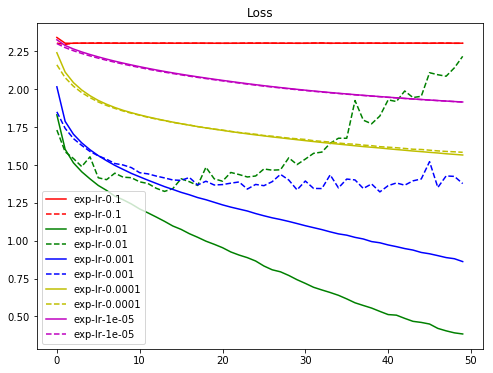

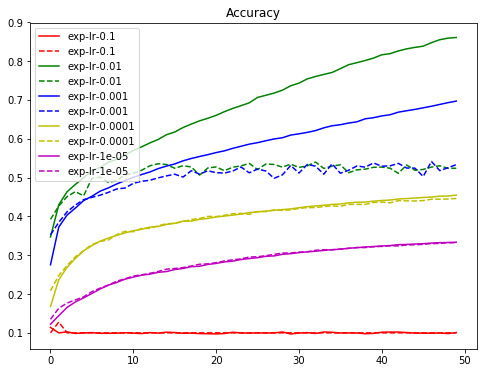

In [14]:
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95


results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 1s 29us/step - loss: 14.4467 - acc: 0.0997 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 1s 27us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 1s 26us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 1s 27us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 1s 27us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 1s 27us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 1s 27us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.

50000/50000 [==============================] - 1s 29us/step - loss: 2.3559 - acc: 0.2073 - val_loss: 1.9330 - val_acc: 0.2713
Epoch 2/50
50000/50000 [==============================] - 1s 26us/step - loss: 1.8903 - acc: 0.3172 - val_loss: 1.9003 - val_acc: 0.2942
Epoch 3/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.7834 - acc: 0.3583 - val_loss: 1.7263 - val_acc: 0.3717
Epoch 4/50
50000/50000 [==============================] - 1s 28us/step - loss: 1.7148 - acc: 0.3861 - val_loss: 1.6860 - val_acc: 0.3907
Epoch 5/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.6525 - acc: 0.4084 - val_loss: 1.6225 - val_acc: 0.4114
Epoch 6/50
50000/50000 [==============================] - 1s 26us/step - loss: 1.6049 - acc: 0.4258 - val_loss: 1.6121 - val_acc: 0.4250
Epoch 7/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.5684 - acc: 0.4387 - val_loss: 1.7760 - val_acc: 0.3757
Epoch 8/50
50000/50000 [============================

Epoch 3/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.7162 - acc: 0.3904 - val_loss: 1.6941 - val_acc: 0.3983
Epoch 4/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.6543 - acc: 0.4143 - val_loss: 1.7012 - val_acc: 0.3857
Epoch 5/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.6145 - acc: 0.4268 - val_loss: 1.6534 - val_acc: 0.4028
Epoch 6/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.5827 - acc: 0.4395 - val_loss: 1.5797 - val_acc: 0.4352
Epoch 7/50
50000/50000 [==============================] - 1s 28us/step - loss: 1.5491 - acc: 0.4514 - val_loss: 1.6730 - val_acc: 0.4111
Epoch 8/50
50000/50000 [==============================] - 1s 28us/step - loss: 1.5204 - acc: 0.4615 - val_loss: 1.5944 - val_acc: 0.4233
Epoch 9/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.4951 - acc: 0.4724 - val_loss: 1.5909 - val_acc: 0.4355
Epoch 10/50
50000/50000 [================

50000/50000 [==============================] - 1s 27us/step - loss: 1.8452 - acc: 0.3613 - val_loss: 1.8296 - val_acc: 0.3670
Epoch 5/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.8070 - acc: 0.3744 - val_loss: 1.7971 - val_acc: 0.3713
Epoch 6/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.7772 - acc: 0.3834 - val_loss: 1.7764 - val_acc: 0.3820
Epoch 7/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.7521 - acc: 0.3915 - val_loss: 1.7483 - val_acc: 0.3879
Epoch 8/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.7301 - acc: 0.3988 - val_loss: 1.7344 - val_acc: 0.4003
Epoch 9/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.7111 - acc: 0.4067 - val_loss: 1.7175 - val_acc: 0.3980
Epoch 10/50
50000/50000 [==============================] - 1s 28us/step - loss: 1.6931 - acc: 0.4137 - val_loss: 1.6975 - val_acc: 0.4115
Epoch 11/50
50000/50000 [==========================

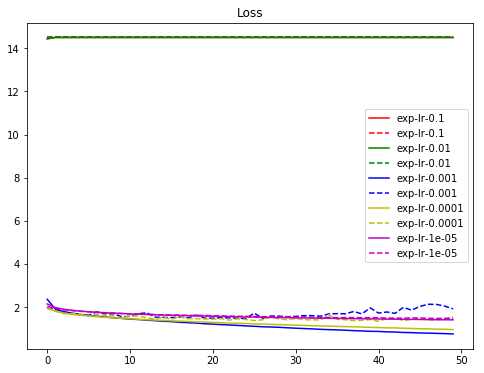

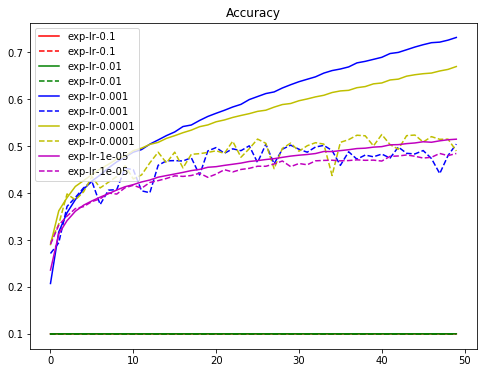

In [30]:
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95


results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.RMSprop(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 1s 29us/step - loss: 14.4294 - acc: 0.1005 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 1s 27us/step - loss: 14.5097 - acc: 0.0996 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 1s 26us/step - loss: 14.5061 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.

Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 1s 29us/step - loss: 2.0154 - acc: 0.2750 - val_loss: 1.9129 - val_acc: 0.3032
Epoch 2/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.8100 - acc: 0.3594 - val_loss: 1.7962 - val_acc: 0.3585
Epoch 3/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.7319 - acc: 0.3873 - val_loss: 1.7109 - val_acc: 0.3849
Epoch 4/50
50000/50000 [==============================] - 1s 26us/step - loss: 1.6851 - acc: 0.4075 - val_loss: 1.7181 - val_acc: 0.3848
Epoch 5/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.6469 - acc: 0.4202 - val_loss: 1.6525 - val_acc: 0.4223
Epoch 6/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.6173 - acc: 0.4329 - val_loss: 1.6370 - val_acc: 0.4195
Epoch 7/50
50000/50000 [==============

50000/50000 [==============================] - 1s 30us/step - loss: 2.0445 - acc: 0.2822 - val_loss: 1.9634 - val_acc: 0.3097
Epoch 2/50
50000/50000 [==============================] - 1s 26us/step - loss: 1.9264 - acc: 0.3289 - val_loss: 1.9038 - val_acc: 0.3383
Epoch 3/50
50000/50000 [==============================] - 1s 26us/step - loss: 1.8816 - acc: 0.3474 - val_loss: 1.8716 - val_acc: 0.3444
Epoch 4/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.8541 - acc: 0.3558 - val_loss: 1.8478 - val_acc: 0.3552
Epoch 5/50
50000/50000 [==============================] - 1s 26us/step - loss: 1.8341 - acc: 0.3624 - val_loss: 1.8317 - val_acc: 0.3596
Epoch 6/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.8178 - acc: 0.3691 - val_loss: 1.8170 - val_acc: 0.3668
Epoch 7/50
50000/50000 [==============================] - 1s 27us/step - loss: 1.8044 - acc: 0.3742 - val_loss: 1.8040 - val_acc: 0.3714
Epoch 8/50
50000/50000 [============================

Epoch 3/50
50000/50000 [==============================] - 1s 27us/step - loss: 2.2120 - acc: 0.2113 - val_loss: 2.2006 - val_acc: 0.2262
Epoch 4/50
50000/50000 [==============================] - 1s 27us/step - loss: 2.1940 - acc: 0.2218 - val_loss: 2.1850 - val_acc: 0.2351
Epoch 5/50
50000/50000 [==============================] - 1s 26us/step - loss: 2.1802 - acc: 0.2296 - val_loss: 2.1724 - val_acc: 0.2418
Epoch 6/50
50000/50000 [==============================] - 1s 26us/step - loss: 2.1687 - acc: 0.2356 - val_loss: 2.1615 - val_acc: 0.2436
Epoch 7/50
50000/50000 [==============================] - 1s 26us/step - loss: 2.1585 - acc: 0.2396 - val_loss: 2.1518 - val_acc: 0.2492
Epoch 8/50
50000/50000 [==============================] - 1s 27us/step - loss: 2.1493 - acc: 0.2449 - val_loss: 2.1429 - val_acc: 0.2522
Epoch 9/50
50000/50000 [==============================] - 1s 27us/step - loss: 2.1410 - acc: 0.2486 - val_loss: 2.1351 - val_acc: 0.2548
Epoch 10/50
50000/50000 [================

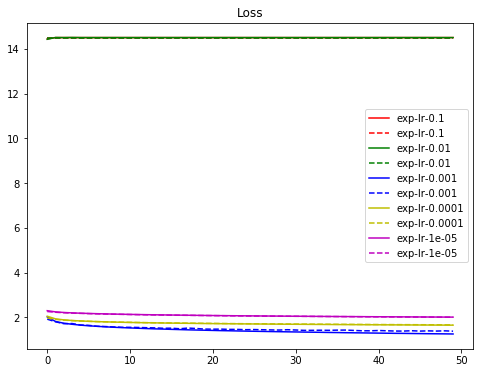

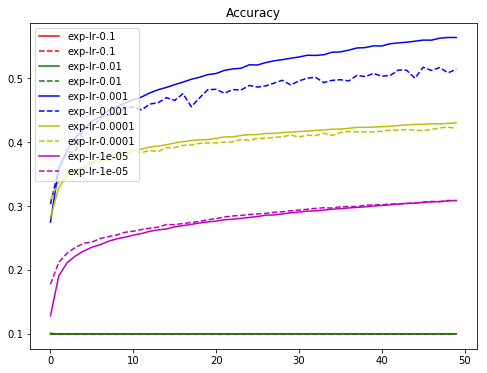

In [28]:
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95


results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adagrad(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 34us/step - loss: 14.4088 - acc: 0.0997 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 1s 30us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 1s 30us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 1s 29us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 1s 29us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 1s 28us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 1s 28us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.

50000/50000 [==============================] - 2s 32us/step - loss: 1.9321 - acc: 0.3034 - val_loss: 1.7673 - val_acc: 0.3736
Epoch 2/50
50000/50000 [==============================] - 1s 29us/step - loss: 1.7151 - acc: 0.3843 - val_loss: 1.6749 - val_acc: 0.3999
Epoch 3/50
50000/50000 [==============================] - 1s 28us/step - loss: 1.6135 - acc: 0.4264 - val_loss: 1.5963 - val_acc: 0.4278
Epoch 4/50
50000/50000 [==============================] - 1s 29us/step - loss: 1.5517 - acc: 0.4456 - val_loss: 1.5533 - val_acc: 0.4443
Epoch 5/50
50000/50000 [==============================] - 1s 28us/step - loss: 1.5139 - acc: 0.4607 - val_loss: 1.5130 - val_acc: 0.4632
Epoch 6/50
50000/50000 [==============================] - 1s 28us/step - loss: 1.4777 - acc: 0.4715 - val_loss: 1.4981 - val_acc: 0.4655
Epoch 7/50
50000/50000 [==============================] - 1s 30us/step - loss: 1.4381 - acc: 0.4858 - val_loss: 1.4789 - val_acc: 0.4706
Epoch 8/50
50000/50000 [============================

50000/50000 [==============================] - 1s 28us/step - loss: 1.7172 - acc: 0.3937 - val_loss: 1.6608 - val_acc: 0.4137
Epoch 3/50
50000/50000 [==============================] - 1s 28us/step - loss: 1.6308 - acc: 0.4246 - val_loss: 1.6222 - val_acc: 0.4247
Epoch 4/50
50000/50000 [==============================] - 1s 29us/step - loss: 1.5814 - acc: 0.4422 - val_loss: 1.5789 - val_acc: 0.4331
Epoch 5/50
50000/50000 [==============================] - 1s 28us/step - loss: 1.5324 - acc: 0.4599 - val_loss: 1.5584 - val_acc: 0.4473
Epoch 6/50
50000/50000 [==============================] - 1s 29us/step - loss: 1.5025 - acc: 0.4727 - val_loss: 1.5114 - val_acc: 0.4576
Epoch 7/50
50000/50000 [==============================] - 1s 29us/step - loss: 1.4646 - acc: 0.4837 - val_loss: 1.4954 - val_acc: 0.4657
Epoch 8/50
50000/50000 [==============================] - 1s 29us/step - loss: 1.4398 - acc: 0.4915 - val_loss: 1.4886 - val_acc: 0.4729
Epoch 9/50
50000/50000 [============================

Epoch 4/50
50000/50000 [==============================] - 1s 28us/step - loss: 1.8060 - acc: 0.3719 - val_loss: 1.7896 - val_acc: 0.3761
Epoch 5/50
50000/50000 [==============================] - 1s 29us/step - loss: 1.7694 - acc: 0.3838 - val_loss: 1.7586 - val_acc: 0.3836
Epoch 6/50
50000/50000 [==============================] - 1s 29us/step - loss: 1.7397 - acc: 0.3950 - val_loss: 1.7322 - val_acc: 0.3949
Epoch 7/50
50000/50000 [==============================] - 1s 29us/step - loss: 1.7135 - acc: 0.4044 - val_loss: 1.7095 - val_acc: 0.4004
Epoch 8/50
50000/50000 [==============================] - 1s 29us/step - loss: 1.6903 - acc: 0.4137 - val_loss: 1.6886 - val_acc: 0.4111
Epoch 9/50
50000/50000 [==============================] - 1s 28us/step - loss: 1.6714 - acc: 0.4194 - val_loss: 1.6695 - val_acc: 0.4176
Epoch 10/50
50000/50000 [==============================] - 1s 28us/step - loss: 1.6541 - acc: 0.4251 - val_loss: 1.6547 - val_acc: 0.4218
Epoch 11/50
50000/50000 [===============

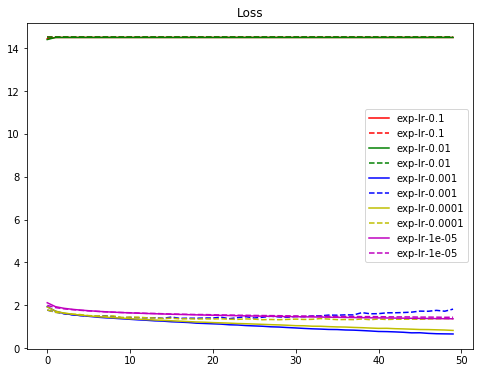

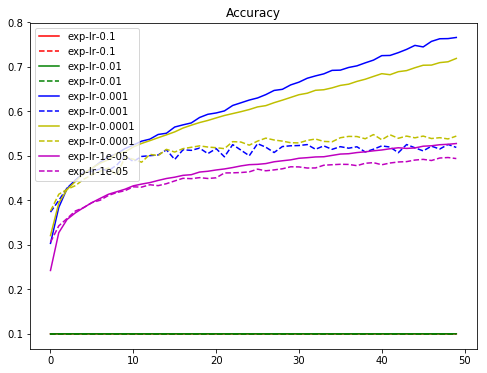

In [32]:
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95


results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()
